In [1]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from pandas import read_csv
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import pickle
from joblib import dump, load

In [2]:
df = pd.read_csv('BTC2019-2024.csv')
df1 = df.reset_index()['Close']

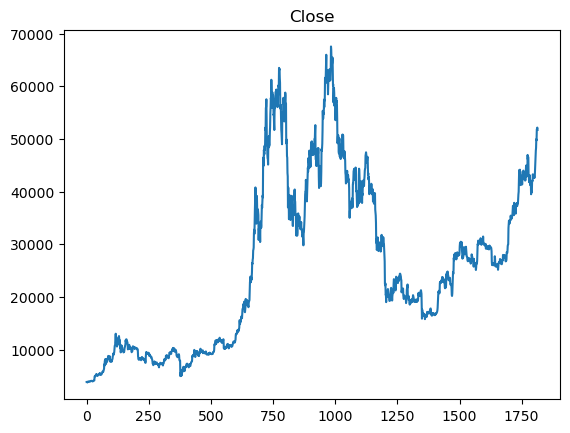

In [3]:
plt.plot(df1)
plt.title("Close")
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))

In [5]:
train_size = int(0.8 * len(df))
test_size = int(0.2 * len(df))


train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]


In [6]:
# 5. Tạo dataset cho mô hình
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [7]:
X_train.shape

(1351, 100)

### RandomForest

In [8]:
model=RandomForestRegressor()

In [9]:
# best_parameters

In [10]:
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [11]:
# Lưu mô hình vào file
with open('Model/rf.pkl', 'wb') as file:
    pickle.dump(model, file)

In [12]:
# Tải mô hình từ file
with open('Model/rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

In [13]:
train_predict = rf_model.predict(X_train)
y_pred = rf_model.predict(X_test)


In [14]:
y_pred

array([0.36582841, 0.36438166, 0.3395707 , 0.36601348, 0.36346739,
       0.36235324, 0.33995083, 0.36523493, 0.34045111, 0.33881323,
       0.34120884, 0.33987508, 0.34113252, 0.34128981, 0.341207  ,
       0.33315875, 0.33925735, 0.34134205, 0.34131208, 0.34109501,
       0.34112153, 0.37003945, 0.42060235, 0.42537936, 0.42747209,
       0.42632809, 0.42644796, 0.4260837 , 0.42733942, 0.42660831,
       0.42677069, 0.42611777, 0.42590386, 0.42629059, 0.42890382,
       0.4275263 , 0.42626729, 0.42564897, 0.42558666, 0.42567531,
       0.42499873, 0.42481206, 0.42405436, 0.42371556, 0.43008628,
       0.42433371, 0.42302666, 0.42317626, 0.42326492, 0.42273381,
       0.42411236, 0.42285395, 0.422957  , 0.42292726, 0.42293251,
       0.40820664, 0.40861786, 0.42242559, 0.40864812, 0.41791387,
       0.42280211, 0.41729294, 0.40950376, 0.42273661, 0.40856719,
       0.40874871, 0.4030887 , 0.40380617, 0.40390754, 0.40820627,
       0.42342503, 0.42251717, 0.42228235, 0.42320134, 0.42340

In [15]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input[0])
lst_output = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input = np.array(temp_input[1:])
        x_input = x_input.reshape(1, -1)
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        lst_output.extend(yhat.tolist())
        i += 1
    else:
        x_input = x_input.reshape((1, n_steps))
        yhat = rf_model.predict(x_input)
        temp_input.extend(yhat.tolist())
        lst_output.extend(yhat.tolist())
        i += 1

lst_output = np.array(lst_output).reshape(-1, 1)

### Bagging

In [16]:
from sklearn.ensemble import BaggingRegressor

In [17]:
# Xây dựng mô hình Bagged
bagged_rf = BaggingRegressor(estimator=rf_model, n_estimators=5, random_state=42)

In [18]:
# Huấn luyện mô hình
bagged_rf.fit(X_train, y_train)

BaggingRegressor(estimator=RandomForestRegressor(), n_estimators=5,
                 random_state=42)

In [19]:
#Lưu mô hình
dump(bagged_rf, 'Model/rf_bagging.joblib')

['Model/rf_bagging.joblib']

In [20]:
# Tải mô hình
bagged_rf = load('Model/rf_bagging.joblib')

In [21]:
#Dự đoán
bagged_train_predict = bagged_rf.predict(X_train)
bagged_y_pred = bagged_rf.predict(X_test)

In [22]:
bagged_y_pred

array([0.36500393, 0.35703205, 0.34386253, 0.35893042, 0.35606709,
       0.35652374, 0.34097421, 0.35816796, 0.34150871, 0.34000028,
       0.33929247, 0.33885494, 0.33919251, 0.33904957, 0.33890843,
       0.33242073, 0.33620271, 0.33878779, 0.33918396, 0.33968383,
       0.34147169, 0.36775348, 0.4138372 , 0.42032355, 0.42268977,
       0.42411593, 0.42270349, 0.42198277, 0.42323695, 0.42369171,
       0.42270616, 0.42324221, 0.42330504, 0.42433989, 0.42569119,
       0.42560881, 0.42540014, 0.42314965, 0.42351235, 0.42381   ,
       0.42382985, 0.42409973, 0.42391529, 0.42410627, 0.42865353,
       0.42564192, 0.42340212, 0.42360867, 0.42362604, 0.42327686,
       0.42334691, 0.42296616, 0.42277877, 0.42271854, 0.42267809,
       0.41094254, 0.41068925, 0.41880554, 0.41085152, 0.41493936,
       0.42000987, 0.41526425, 0.41195916, 0.4210352 , 0.41032888,
       0.41029741, 0.40420778, 0.40368863, 0.40349986, 0.40952529,
       0.42053481, 0.42002722, 0.42028558, 0.41958503, 0.42038

In [23]:
# 11. Dự báo giá cho 30 ngày tiếp theo
x_input1 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input1[0])
bagg_lst_output1 = []
n_steps = 100
i = 0
while i < 30:
    if len(temp_input) > 100:
        x_input1 = np.array(temp_input[1:])
        x_input1 = x_input1.reshape(1, -1)
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output1.extend(yhat.tolist())
        i += 1
    else:
        x_input1 = x_input1.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input1)
        temp_input.extend(yhat.tolist())
        bagg_lst_output1.extend(yhat.tolist())
        i += 1

bagg_lst_output1 = np.array(bagg_lst_output1).reshape(-1, 1)


In [24]:
# 11. Dự báo giá cho 60 ngày tiếp theo
x_input2 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input2[0])
bagg_lst_output2 = []
n_steps = 100
i = 0
while i < 60:
    if len(temp_input) > 100:
        x_input2 = np.array(temp_input[1:])
        x_input2 = x_input2.reshape(1, -1)
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output2.extend(yhat.tolist())
        i += 1
    else:
        x_input2 = x_input2.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input2)
        temp_input.extend(yhat.tolist())
        bagg_lst_output2.extend(yhat.tolist())
        i += 1

bagg_lst_output2 = np.array(bagg_lst_output2).reshape(-1, 1)

In [25]:
# 11. Dự báo giá cho 90 ngày tiếp theo
x_input3 = test_data[-time_step:].reshape(1, -1)
temp_input = list(x_input3[0])
bagg_lst_output3 = []
n_steps = 100
i = 0
while i < 90:
    if len(temp_input) > 100:
        x_input3 = np.array(temp_input[1:])
        x_input3 = x_input3.reshape(1, -1)
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        temp_input = temp_input[1:]
        bagg_lst_output3.extend(yhat.tolist())
        i += 1
    else:
        x_input3 = x_input3.reshape((1, n_steps))
        yhat = bagged_rf.predict(x_input3)
        temp_input.extend(yhat.tolist())
        bagg_lst_output3.extend(yhat.tolist())
        i += 1

bagg_lst_output3 = np.array(bagg_lst_output3).reshape(-1, 1)

### Trực quan

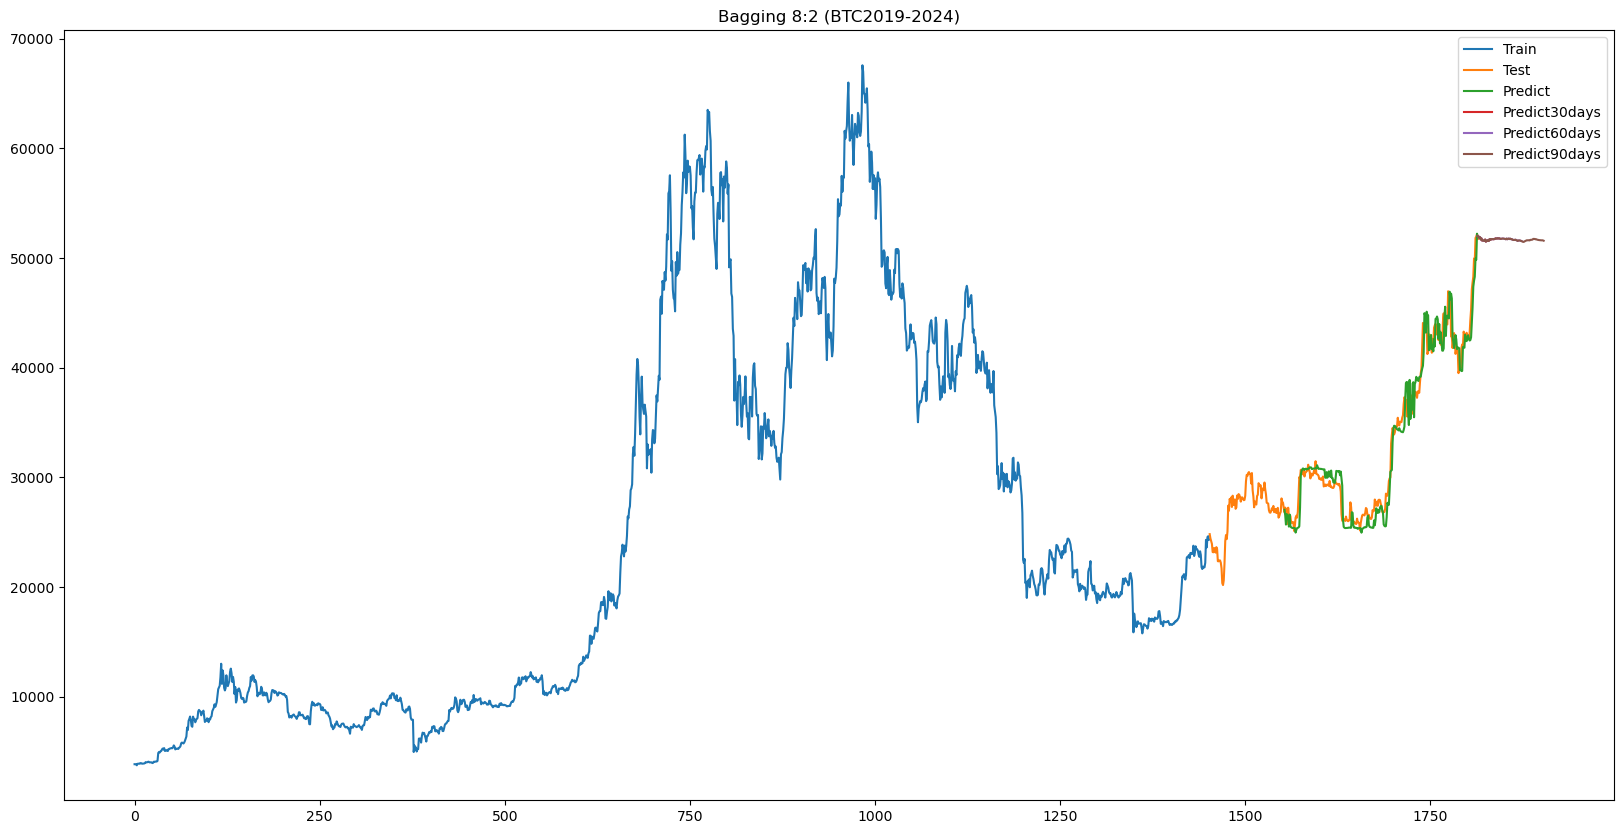

In [26]:
plt.figure(figsize=(20, 10))

plt.title('Bagging 8:2 (BTC2019-2024)')
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(bagged_y_pred.reshape(-1,1)))
prediect_data_index1 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index1,scaler.inverse_transform(bagg_lst_output1))
prediect_data_index2 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+59, step=1)
plt.plot(prediect_data_index2,scaler.inverse_transform(bagg_lst_output2))
prediect_data_index3 = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+89, step=1)
plt.plot(prediect_data_index3,scaler.inverse_transform(bagg_lst_output3))
plt.legend(['Train','Test','Predict','Predict30days','Predict60days','Predict90days'])
plt.show()

In [27]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler



# Assume you have predictions in the scaled form
predictions_scaled = np.array(bagged_y_pred).reshape(-1, 1)
predictions_scaled1 = np.array(y_test).reshape(-1, 1)

# Inverse transform the scaled predictions
predictions_original = scaler.inverse_transform(predictions_scaled)
predictions_original1 = scaler.inverse_transform(predictions_scaled1)


In [28]:
#Đánh giá trên tập test
print("Chỉ số MSE trên tập test")
print("Bagging:", round(metrics.mean_squared_error(y_test, predictions_original), 4))
test_rmse = np.sqrt(np.mean((predictions_original - predictions_original1)**2))
print('Testing RMSE:', test_rmse)
# Tính MAPE
test_mape = np.mean(np.abs((predictions_original - predictions_original1) / y_test)) * 100
print('Testing MAPE:', test_mape)

Chỉ số MSE trên tập test
Bagging: 1189727729.5284
Testing RMSE: 1105.9622883185982
Testing MAPE: 197920.56641699505
